In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import  Counter
from tqdm import tqdm

/home/mikel/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [4]:
df = pd.read_csv('../../data/nba_all.csv', index_col=0)

In [5]:
df.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
0,2000-10-31,7:30p,Charlotte Hornets,106.0,Atlanta Hawks,82.0,18465.0,240.0,35.0,62.0,...,46.7,10.2,3.8,12.6,100.0,92.8,119.9,2,0,2001
1,2000-10-31,8:30p,Sacramento Kings,100.0,Chicago Bulls,81.0,21814.0,240.0,40.0,73.0,...,73.1,8.9,6.7,19.2,100.0,89.6,110.6,2,0,2001
2,2000-10-31,8:00p,Milwaukee Bucks,93.0,Dallas Mavericks,97.0,16600.0,240.0,33.0,83.0,...,62.9,9.6,14.1,14.5,100.0,103.4,99.1,2,1,2001
3,2000-10-31,10:30p,Phoenix Suns,94.0,Golden State Warriors,96.0,15460.0,240.0,36.0,91.0,...,56.3,10.8,7.1,18.0,100.0,94.7,92.7,2,1,2001
4,2000-10-31,8:30p,Minnesota Timberwolves,106.0,Houston Rockets,98.0,11327.0,240.0,43.0,88.0,...,52.9,9.4,9.1,16.4,100.0,102.9,111.3,2,0,2001


In [6]:
df.tail()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
22799,2019-02-08,9:30p,Minnesota Timberwolves,117.0,New Orleans Pelicans,122.0,16980.0,240.0,46.0,91.0,...,62.8,10.5,10.0,9.6,100.0,116.7,112.0,5,1,2019
22800,2019-02-08,7:00p,Denver Nuggets,110.0,Philadelphia 76ers,117.0,20627.0,240.0,46.0,94.0,...,59.0,6.9,7.4,15.6,100.0,115.9,108.9,5,1,2019
22801,2019-02-08,9:00p,Golden State Warriors,117.0,Phoenix Suns,107.0,17081.0,240.0,41.0,81.0,...,59.0,11.7,1.9,8.8,100.0,104.1,113.9,5,0,2019
22802,2019-02-08,10:00p,Miami Heat,96.0,Sacramento Kings,102.0,17583.0,240.0,38.0,88.0,...,48.6,10.9,9.1,11.4,100.0,100.9,94.9,5,1,2019
22803,2019-02-08,7:00p,Cleveland Cavaliers,106.0,Washington Wizards,119.0,16682.0,240.0,36.0,96.0,...,76.1,9.8,6.9,13.9,100.0,116.9,104.1,5,1,2019


In [7]:
len(df)

22804

In [9]:
df.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
0,2000-10-31,7:30p,Charlotte Hornets,106.0,Atlanta Hawks,82.0,18465.0,240.0,35.0,62.0,...,46.7,10.2,3.8,12.6,100.0,92.8,119.9,2,0,2001
1,2000-10-31,8:30p,Sacramento Kings,100.0,Chicago Bulls,81.0,21814.0,240.0,40.0,73.0,...,73.1,8.9,6.7,19.2,100.0,89.6,110.6,2,0,2001
2,2000-10-31,8:00p,Milwaukee Bucks,93.0,Dallas Mavericks,97.0,16600.0,240.0,33.0,83.0,...,62.9,9.6,14.1,14.5,100.0,103.4,99.1,2,1,2001
3,2000-10-31,10:30p,Phoenix Suns,94.0,Golden State Warriors,96.0,15460.0,240.0,36.0,91.0,...,56.3,10.8,7.1,18.0,100.0,94.7,92.7,2,1,2001
4,2000-10-31,8:30p,Minnesota Timberwolves,106.0,Houston Rockets,98.0,11327.0,240.0,43.0,88.0,...,52.9,9.4,9.1,16.4,100.0,102.9,111.3,2,0,2001


In [10]:
df = df[~df['DATE'].str.contains('Pla')]

In [11]:
dict_months = {'Oct': 10, 'Nov': 11, 'Dec': 12, 'Jan': 1, 'Feb': 2, 'Mar': 3, \
               'Apr': 4, 'May': 5, 'Jun': 6}

In [12]:
dict_day_of_the_week = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, \
               'Sun': 7,}

In [44]:
date = 'Tue, Oct 27, 2009'

In [45]:
def map_dates(x):
    
    year = x.split(', ')[-1]
    month = dict_months[date.split(' ')[1]]
    day = date.split(' ')[2].split(',')[0]
    whole_date = str(year) + '-' + str(month) + '-' + str(day)
    try:
        dt = datetime.datetime.strptime(whole_date, '%Y-%m-%d')
    except:
        dt = ''
    return df

def map_day_of_the_week(x):

    day_of_the_week = dict_day_of_the_week[x.split(' ')[0].split(',')[0]]
    
    return day_of_the_week
    

In [46]:
df['DAY_OF_WEEK'] = 0

In [47]:
df.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_DRB%,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK
0,"Tue, Oct 29, 2002",10:30p,San Antonio Spurs,87.0,Los Angeles Lakers,82.0,18997.0,240.0,26.0,71.0,...,73.8,48.0,59.3,10.3,8.2,15.5,100.0,84.7,89.9,0
1,"Tue, Oct 29, 2002",7:30p,Philadelphia 76ers,88.0,Orlando Magic,95.0,15225.0,240.0,31.0,78.0,...,73.8,45.9,66.7,4.1,11.4,14.2,100.0,98.2,91.0,0
2,"Tue, Oct 29, 2002",10:00p,Cleveland Cavaliers,67.0,Sacramento Kings,94.0,17317.0,240.0,27.0,83.0,...,66.0,51.1,58.3,13.1,12.7,17.4,100.0,102.9,73.3,0
3,"Wed, Oct 30, 2002",7:00p,Chicago Bulls,99.0,Boston Celtics,96.0,18624.0,240.0,39.0,78.0,...,71.4,44.0,69.4,8.6,0.0,14.7,100.0,102.7,105.9,0
4,"Wed, Oct 30, 2002",8:00p,New York Knicks,77.0,Detroit Pistons,86.0,22076.0,240.0,31.0,82.0,...,80.0,60.2,55.6,5.7,8.6,20.3,100.0,98.6,88.2,0


In [48]:
df['DAY_OF_WEEK'] = df['DATE'].apply(lambda x: map_day_of_the_week(x))

In [49]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [50]:
df.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_DRB%,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK
0,2002-10-29,10:30p,San Antonio Spurs,87.0,Los Angeles Lakers,82.0,18997.0,240.0,26.0,71.0,...,73.8,48.0,59.3,10.3,8.2,15.5,100.0,84.7,89.9,2
1,2002-10-29,7:30p,Philadelphia 76ers,88.0,Orlando Magic,95.0,15225.0,240.0,31.0,78.0,...,73.8,45.9,66.7,4.1,11.4,14.2,100.0,98.2,91.0,2
2,2002-10-29,10:00p,Cleveland Cavaliers,67.0,Sacramento Kings,94.0,17317.0,240.0,27.0,83.0,...,66.0,51.1,58.3,13.1,12.7,17.4,100.0,102.9,73.3,2
3,2002-10-30,7:00p,Chicago Bulls,99.0,Boston Celtics,96.0,18624.0,240.0,39.0,78.0,...,71.4,44.0,69.4,8.6,0.0,14.7,100.0,102.7,105.9,3
4,2002-10-30,8:00p,New York Knicks,77.0,Detroit Pistons,86.0,22076.0,240.0,31.0,82.0,...,80.0,60.2,55.6,5.7,8.6,20.3,100.0,98.6,88.2,3


In [51]:
df['LABEL'] = 0

In [52]:
m1 = df['PTS'] > df['PTS.1']
m2 = df['PTS'] < df['PTS.1']

df['LABEL'] = np.select([m1, m2], [0, 1], default=1)

In [53]:
df.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL
0,2002-10-29,10:30p,San Antonio Spurs,87.0,Los Angeles Lakers,82.0,18997.0,240.0,26.0,71.0,...,48.0,59.3,10.3,8.2,15.5,100.0,84.7,89.9,2,0
1,2002-10-29,7:30p,Philadelphia 76ers,88.0,Orlando Magic,95.0,15225.0,240.0,31.0,78.0,...,45.9,66.7,4.1,11.4,14.2,100.0,98.2,91.0,2,1
2,2002-10-29,10:00p,Cleveland Cavaliers,67.0,Sacramento Kings,94.0,17317.0,240.0,27.0,83.0,...,51.1,58.3,13.1,12.7,17.4,100.0,102.9,73.3,2,1
3,2002-10-30,7:00p,Chicago Bulls,99.0,Boston Celtics,96.0,18624.0,240.0,39.0,78.0,...,44.0,69.4,8.6,0.0,14.7,100.0,102.7,105.9,3,0
4,2002-10-30,8:00p,New York Knicks,77.0,Detroit Pistons,86.0,22076.0,240.0,31.0,82.0,...,60.2,55.6,5.7,8.6,20.3,100.0,98.6,88.2,3,1


In [54]:
len(df.columns)

77

In [13]:
## Teams to replace:
#'Charlotte Bobcats' -> 'Charlotte Hornets'
#'New Orleans Hornets' -> 'New Orleans Pelicans'
#'New Jersey Nets' -> 'Brooklyn Nets'

df['VISITOR'] = df['VISITOR'].replace(['Charlotte Bobcats', 'New Orleans Hornets', 'New Jersey Nets'], \
                                      ['Charlotte Hornets', 'New Orleans Pelicans', 'Brooklyn Nets'])

df['HOME'] = df['HOME'].replace(['Charlotte Bobcats', 'New Orleans Hornets', 'New Jersey Nets'], \
                                      ['Charlotte Hornets', 'New Orleans Pelicans', 'Brooklyn Nets'])



df['VISITOR'] = df['VISITOR'].replace(['New Orleans/Oklahoma City Hornets', 'Seattle SuperSonics'], \
                                      ['New Orleans Pelicans', 'Oklahoma City Thunder'])

df['HOME'] = df['HOME'].replace(['New Orleans/Oklahoma City Hornets', 'Seattle SuperSonics'], \
                                      ['New Orleans Pelicans', 'Oklahoma City Thunder'])

###############
Counter({'San Antonio Spurs': 832, 'Miami Heat': 799, 'Boston Celtics': 796, 'Los Angeles Lakers': 795, 'Cleveland Cavaliers': 793, 'Dallas Mavericks': 789, 'Indiana Pacers': 777, 'Detroit Pistons': 774, 'Oklahoma City Thunder': 771, 'Golden State Warriors': 770, 'Atlanta Hawks': 769, 'Houston Rockets': 769, 'Chicago Bulls': 764, 'Brooklyn Nets': 759, 'Utah Jazz': 757, 'Toronto Raptors': 757, 'Philadelphia 76ers': 756, 'Phoenix Suns': 755, 'Los Angeles Clippers': 754, 'Milwaukee Bucks': 752, 'Orlando Magic': 752, 'Denver Nuggets': 752, 'Washington Wizards': 750, 'Portland Trail Blazers': 746, 'Sacramento Kings': 737, 'Minnesota Timberwolves': 735, 'New York Knicks': 733, 'Memphis Grizzlies': 717, 'New Orleans Pelicans': 705, 'Charlotte Hornets': 648, 'Vancouver Grizzlies': 41})


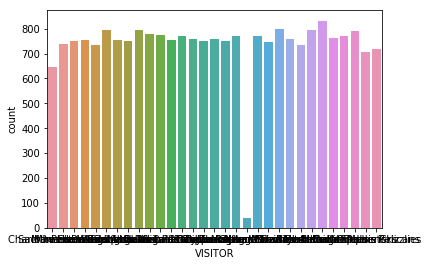

###############
Counter({'San Antonio Spurs': 838, 'Miami Heat': 808, 'Boston Celtics': 805, 'Los Angeles Lakers': 795, 'Cleveland Cavaliers': 791, 'Detroit Pistons': 785, 'Dallas Mavericks': 784, 'Golden State Warriors': 777, 'Oklahoma City Thunder': 774, 'Indiana Pacers': 774, 'Houston Rockets': 767, 'Chicago Bulls': 761, 'Brooklyn Nets': 761, 'Phoenix Suns': 760, 'Atlanta Hawks': 758, 'Orlando Magic': 757, 'Philadelphia 76ers': 757, 'Utah Jazz': 756, 'Toronto Raptors': 753, 'Portland Trail Blazers': 749, 'Los Angeles Clippers': 749, 'Denver Nuggets': 747, 'Washington Wizards': 747, 'Milwaukee Bucks': 747, 'Sacramento Kings': 740, 'New York Knicks': 732, 'Minnesota Timberwolves': 732, 'Memphis Grizzlies': 712, 'New Orleans Pelicans': 699, 'Charlotte Hornets': 648, 'Vancouver Grizzlies': 41})


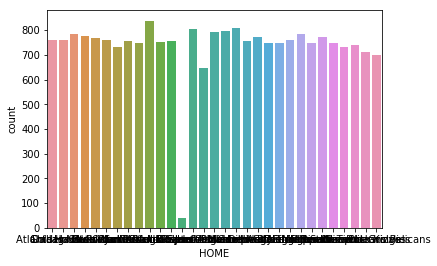

###############
Counter({3: 4712, 5: 4388, 6: 3454, 2: 3036, 7: 2851, 1: 2801, 4: 1562})


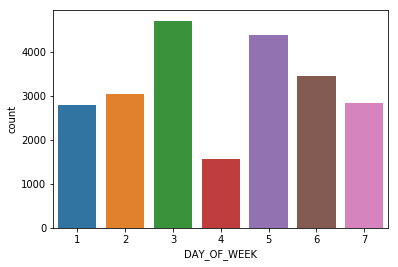

###############
Counter({1: 13683, 0: 9121})


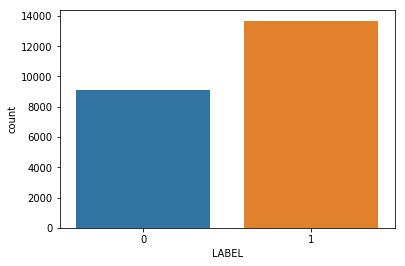

In [14]:
for col in ['VISITOR', 'HOME', 'DAY_OF_WEEK', 'LABEL']:
    
    print('###############')
    
    print(Counter(df[col]))
    sns.countplot(df[col])
    plt.show()


In [73]:
def map_year(x):
   
    month = x.month
    
    if month in [10, 11, 12]:
        
        year = x.year +1
        
        return year
    if month in [1, 2, 3, 4, 5, 6]:
    
        year = x.year
        
        return year
        
    

In [74]:
df['YEAR'] = df['DATE'].apply(lambda x : map_year(x))

In [97]:
## Computing home court advantage:


In [107]:
team = 'Detroit Pistons'

In [108]:
df_eg = df[(df['HOME'] == team )|(df['VISITOR'] == team )]

In [109]:
df_eg.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
4,2002-10-30,8:00p,New York Knicks,77.0,Detroit Pistons,86.0,22076.0,240.0,31.0,82.0,...,55.6,5.7,8.6,20.3,100.0,98.6,88.2,3,1,2003
22,2002-11-01,8:00p,Memphis Grizzlies,86.0,Detroit Pistons,109.0,18113.0,240.0,33.0,75.0,...,72.5,6.4,5.6,13.9,100.0,116.7,92.1,5,1,2003
41,2002-11-03,3:30p,Detroit Pistons,72.0,Los Angeles Clippers,74.0,14275.0,240.0,26.0,81.0,...,59.1,5.8,6.9,12.4,100.0,85.9,83.6,7,1,2003
49,2002-11-04,9:00p,Detroit Pistons,84.0,Phoenix Suns,82.0,13256.0,240.0,33.0,82.0,...,51.5,2.3,14.3,16.4,100.0,95.3,97.6,1,0,2003
66,2002-11-06,9:00p,Detroit Pistons,80.0,Utah Jazz,78.0,15055.0,240.0,26.0,66.0,...,54.2,12.0,20.8,19.8,100.0,93.6,96.0,3,0,2003


In [110]:
selected_year = 2004



tot_home_wins = 0
tot_home_loss = 0
tot_visitor_wins = 0
tot_visitor_loss = 0


df_eg = df_eg[df_eg['YEAR'] == selected_year]

df_eg = df_eg.reset_index()

tot_games = len(df_eg)


for i in tqdm(range(len(df_eg))):
    
    if df_eg['HOME'][i] == team:
        
        if df_eg['LABEL'][i] == 1:
            tot_home_wins += 1
        else:
            tot_home_loss += 1
            
    if df_eg['VISITOR'][i] == team:
        
        if df_eg['LABEL'][i] == 0:
            tot_visitor_wins += 1 
        else:
            tot_visitor_loss +=1

100%|██████████| 105/105 [00:00<00:00, 9303.55it/s]


In [111]:
tot_home_wins

41

In [112]:
tot_home_loss

13

In [113]:
tot_visitor_wins

29

In [114]:
tot_visitor_loss

22

In [115]:
tot_games

105

In [116]:
tot_home_wins /(tot_home_wins+tot_home_loss)*100

75.92592592592592

In [117]:
tot_visitor_wins /(tot_visitor_wins+tot_visitor_loss)*100

56.86274509803921

In [119]:
593/263

2.2547528517110265